# Kickstarter Campaign Analysis

### Project objectives:
Kickstarter is an online crowdfunding platform aimed at helping people get their ideas funded while building a community of fans to support their ideas. While Kickstarter publishes many advice and best-practices articles on their blog, over half of campaigns still fail. 

**Why does this matter?** Well unlike their competitor, Indiegogo, Kickstarter campaign projects follow an "all or nothing" funding model. This means that if a Kickstarter campaign fails, both the project creators are disappointed, as well as the people who *did contribute* because the project will not be completed in any capacity.

**This project's objectives are the following:**
- Understand the marketplace of Kickstarter including timing of campaigns posted, types of projects, location of campaigns, description of campaigns and more
- Provide insight into attributes that set campaigns up for a higher rate of success to inform campaign creation in the future
- Build a predictive model that allows Kickstarter to identify high-failure-risk campaigns before they fail and provide supplemental advice and material to the creators

**Why data mining makes this problem approachable:** With over 4,700+ projects [live right now](https://www.kickstarter.com/help/stats?ref=2014datayir), it would be impossible for Kickstarter employees to monitor each campaign individually to support their success. Applying data mining to this problem allows Kickstarter to scale their support and outreach to their creator community with minimal, targeted work.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
from scipy.stats import ttest_ind
%pylab inline
import warnings 
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# This dataset is used for all the analysis. 
kickstarter = pd.read_csv("kickstarter_data_with_features.csv", index_col = 0)
kickstarter.head(2)

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,NaN
1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,US,...,20,2015,9,3,2,2015,16,10 days 06:44:39.000000000,60 days 00:00:00.000000000,NaN


In [3]:
kickstarter.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'creator', 'location', 'category', 'profile',
       'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len',
       'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch

### Dataset background
This data comes from [Web Robots](https://webrobots.io/kickstarter-datasets/) and their data crawl as of February 1st 2017. Important attributes are described below:

- **Project:** a finite work with a clear goal that you’d like to bring to life (aka campaign)
- **Funding goal:** amount of money that a creator needs to complete their project
- **Name:** name of project on Kickstarter
- **Blurb:** the short description displayed under the name of your project and on the browse page
- **Pledged and backers:** amount of money that a project has raised and people that have supported it at the point of the API pull
- **State:** successful, failed, cancelled, live or suspended
- **Deadline, state changed, created at, launched at:** deadline given for successful funding, state changed when campaign went to success or failure, time the project was created at, time the project was launched at
- **Other attributes in this dataset:** country, currency, category

In [4]:
print (f"This dataset has information on ", len(kickstarter)," project campaigns.")

This dataset has information on  20632  project campaigns.


### Summarizing and exploring the data

<AxesSubplot:>

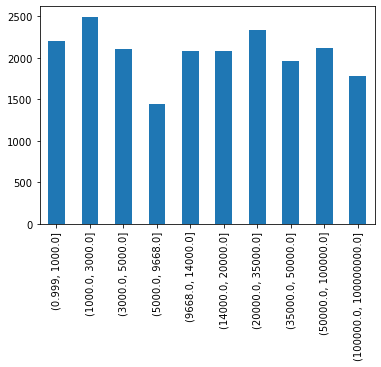

In [5]:
pd.qcut(kickstarter['goal'], 10).value_counts().sort_index().plot(kind='bar')

In [6]:
#This function is used to plot the line graph of Distribution of Campaigns over Weekdays for a particular category.

def one(x): 
    kickstarters = kickstarter[kickstarter['category']==x]
    plot_df = pd.concat([kickstarters['launched_at_weekday'].value_counts(),
                         kickstarters['deadline_weekday'].value_counts(),
                        kickstarters['created_at_weekday'].value_counts()], axis=1)
    plot_df.index = ["(5) Friday","(1) Monday","(6) Saturday","(7) Sunday","(4) Thursday","(2) Tuesday","(3) Wednesday"]
    plot_df = plot_df.sort_index()
    plot_df.plot(kind='line', figsize=(10,5), title = f"Distribution of Campaigns over Weekdays for {x} Category")

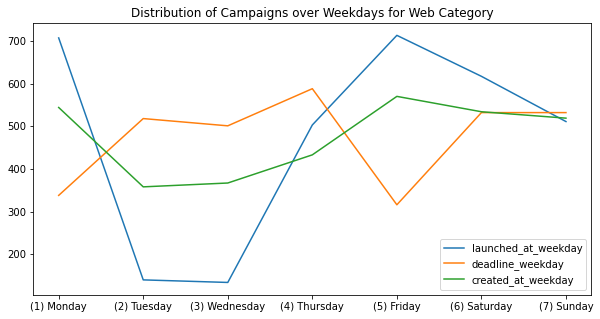

In [7]:
# Pass the category as argument  
one('Web')

In [8]:
# This function gives line graph of Distribution of Campaigns over UTC Day by hour for particular Category.

def two(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    plot_df = pd.concat([kickstarters['deadline_hr'].value_counts(),
                         kickstarters['created_at_hr'].value_counts(),
                        kickstarters['launched_at_hr'].value_counts()], axis=1)
    plot_df = plot_df.sort_index()
    plot_df.plot(kind='line', figsize=(10,5), title = f"Distribution of Campaigns over UTC Day by hour for {x} category")

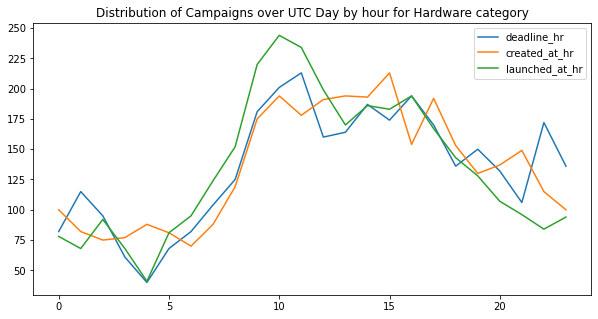

In [9]:
# pass the category 
two('Hardware')

In [10]:
#it gives multiple bar graphs of various features for a particular category.

def three(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.subplots_adjust(hspace=1, wspace = 1)

    kickstarters['country'].value_counts().plot(kind = 'bar',ax=axes[0,0], title = 'Country Distribution', figsize=(15,15))
    kickstarters['deadline_weekday'].value_counts().plot(kind = 'bar',ax=axes[0,1], title = 'Deadline Weekday Distribution', figsize=(15,15))
    kickstarters['created_at_weekday'].value_counts().plot(kind = 'bar',ax=axes[1,0], title = 'Created At Weekday Distribution', figsize=(15,15))
    kickstarters['launched_at_weekday'].value_counts().plot(kind = 'bar',ax=axes[1,1], title = 'Launched At Weekday Distribution', figsize=(15,15))


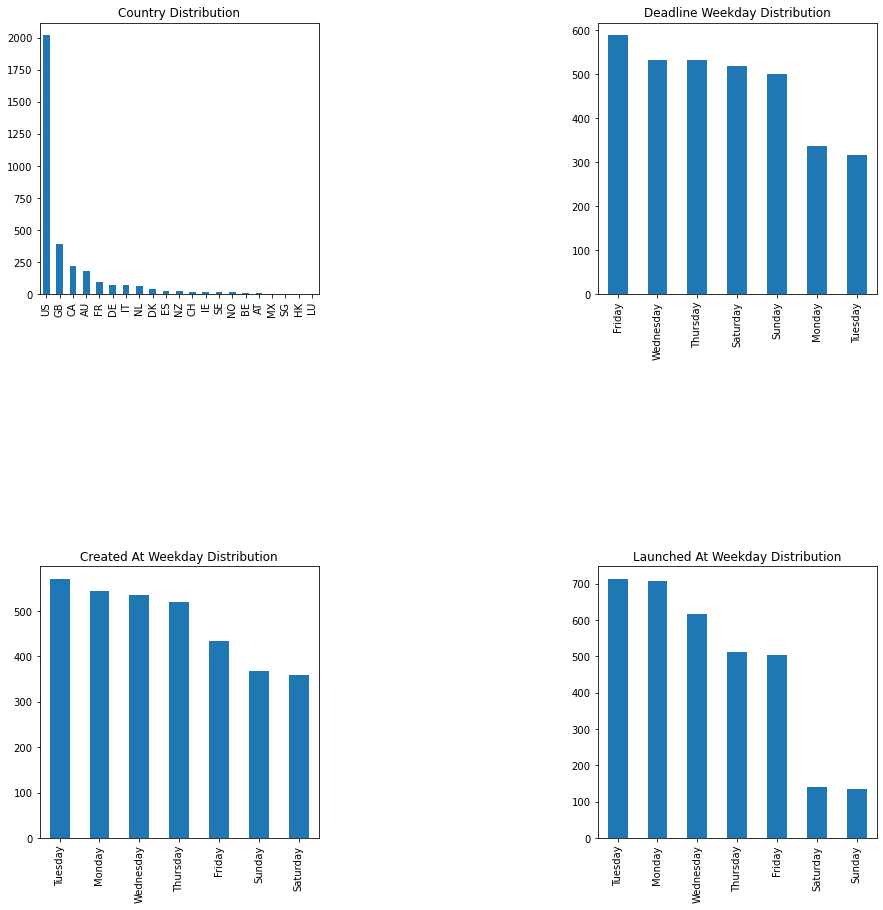

In [11]:
# pass the category  
three('Web')

In [12]:
def extract_days(val):
    try:
        l = val.split(" ")
        return int(l[0])
    except:
        return np.nan

kickstarter['create_to_launch_days'] = kickstarter['create_to_launch'].map(extract_days)
kickstarter['launch_to_deadline_days'] = kickstarter['launch_to_deadline'].map(extract_days)
kickstarter['launch_to_state_change_days'] = kickstarter['launch_to_state_change'].map(extract_days)
kickstarter.head(1)

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,NaN,17,36,NaN


In [13]:
# it gives a bar plot for in how many weeks becomes successful after lauch for a particular category.
def four(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    def return_week_bins(val):
        if val < 7:
            return "< 1 week"
        elif val < 14:
            return "1-2 weeks"
        elif val < 28:
            return "2-4 weeks"
        elif val < 35:
            return "4-5 weeks"
        elif val < 42:
            return "5-6 weeks"
        elif val < 56:
            return "6-8 weeks"
        else:
            return "8+ weeks"

    successful_state_series = kickstarters[kickstarters['state'] == "successful"]['launch_to_deadline_days']
    successful_state_series.map(return_week_bins).value_counts().plot(kind='bar')

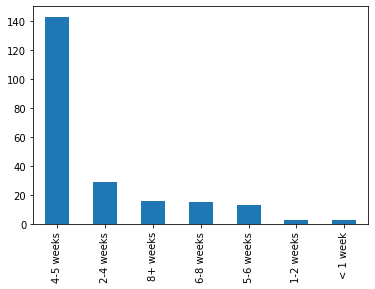

In [14]:
#pass the category
four('Web')

In [15]:
# gives the bar plot of for create to launch days for a particular category 
def five(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    def return_date_bins(val):
        if val < 1:
            return "0-1 day"
        elif val < 2:
            return "1-2 days"
        elif val < 7:
            return "2-7 days"
        elif val < 21:
            return "7-21 days"
        elif val < 42:
            return "21-42 days"
        elif val < 63:
            return "42-63 days"
        else:
            return "63+ days"

    create_launch_series = kickstarters['create_to_launch_days']
    create_launch_series.map(return_date_bins).value_counts().plot(kind='bar')

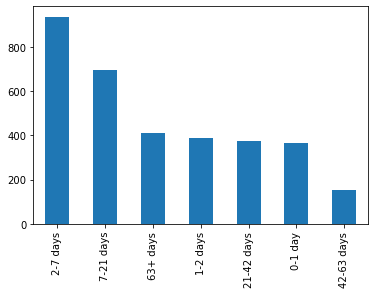

In [16]:
#pass the category
five('Web')

### Comparing successful, failed and cancelled campaigns

In [17]:
# How many projects are successful,failed and cancelled for a particular category. 
def six(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    successful_kickstarters = kickstarters[kickstarters['state'] == "successful"]
    failed_kickstarters = kickstarters[kickstarters['state'] == "failed"]
    cancelled_kickstarters = kickstarters[kickstarters['state'] == "canceled"]
    print(len(successful_kickstarters)," successful campaigns")
    print(len(failed_kickstarters)," failed campaigns")
    print(len(cancelled_kickstarters)," cancelled campaigns")

In [18]:
#pass the category
six('Web')

222  successful campaigns
2502  failed campaigns
520  cancelled campaigns


In [19]:
#plot gives Distribution of time between launch and deadline for successful and failed campaigns for particular category
def seven(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    successful_kickstarters = kickstarters[kickstarters['state'] == "successful"]
    failed_kickstarters = kickstarters[kickstarters['state'] == "failed"]
    cancelled_kickstarters = kickstarters[kickstarters['state'] == "canceled"]
    def return_week_bins(val):
        if val < 7:
            return "< 1 week"
        elif val < 14:
            return "1-2 weeks"
        elif val < 28:
            return "2-4 weeks"
        elif val < 35:
            return "4-5 weeks"
        elif val < 42:
            return "5-6 weeks"
        elif val < 56:
            return "6-8 weeks"
        else:
            return "8+ weeks"
    
    n = 'launch_to_deadline_days'
    compare_L2D = pd.concat([kickstarters[n].apply(return_week_bins).value_counts(),successful_kickstarters[n].apply(return_week_bins).value_counts(),failed_kickstarters[n].apply(return_week_bins).value_counts(),cancelled_kickstarters[n].apply(return_week_bins).value_counts()], axis=1)
    compare_L2D.columns = ['all','successful','failed','cancelled']
    compare_L2D.loc['total'] = compare_L2D.sum(axis=0)

    def get_perc(val, col):
        return (float(val) / float(compare_L2D[col]['total']))*100

    compare_L2D['all_perc'] = compare_L2D['all'].apply(get_perc, args=('all',))
    compare_L2D['success_perc'] = compare_L2D['successful'].apply(get_perc, args=('successful',))
    compare_L2D['failed_perc'] = compare_L2D['failed'].apply(get_perc, args=('failed',))
    compare_L2D['cancelled_perc'] = compare_L2D['cancelled'].apply(get_perc, args=('cancelled',)) 

    compare_L2D[['success_perc','failed_perc']][:6].sort_index().plot(kind='bar', figsize=(10,5), title = "Distribution of time between launch and deadline for successful and failed campaigns")

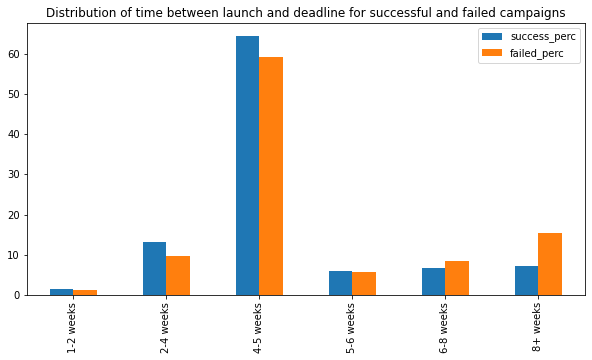

In [20]:
seven('Web')

In [21]:
#to show the Distribution of time between creation to launch for successful and failed campaigns for particular category
def eight(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    successful_kickstarters = kickstarters[kickstarters['state'] == "successful"]
    failed_kickstarters = kickstarters[kickstarters['state'] == "failed"]
    cancelled_kickstarters = kickstarters[kickstarters['state'] == "canceled"]
    
    def return_date_bins(val):
        if val < 1:
            return "0-1 day"
        elif val < 2:
            return "1-2 days"
        elif val < 7:
            return "2-7 days"
        elif val < 21:
            return "7-21 days"
        elif val < 42:
            return "21-42 days"
        elif val < 63:
            return "42-63 days"
        else:
            return "63+ days"
        
    def get_perc(val, col):
        return (float(val) / float(compare_C2L[col]['total']))*100

    n = 'create_to_launch_days'
    compare_C2L = pd.concat([kickstarters[n].apply(return_date_bins).value_counts(),successful_kickstarters[n].apply(return_date_bins).value_counts(),failed_kickstarters[n].apply(return_date_bins).value_counts(),cancelled_kickstarters[n].apply(return_date_bins).value_counts()], axis=1)
    compare_C2L.columns = ['all','successful','failed','cancelled']
    compare_C2L.loc['total'] = compare_C2L.sum(axis=0)

    compare_C2L['all_perc'] = compare_C2L['all'].apply(get_perc, args=('all',))
    compare_C2L['success_perc'] = compare_C2L['successful'].apply(get_perc, args=('successful',))
    compare_C2L['failed_perc'] = compare_C2L['failed'].apply(get_perc, args=('failed',))
    compare_C2L['cancelled_perc'] = compare_C2L['cancelled'].apply(get_perc, args=('cancelled',))
    
    print(compare_C2L)

    compare_C2L[['success_perc','failed_perc']][:7].sort_index().plot(kind='bar', figsize=(10,5), title = "Distribution of time between creation to launch for successful and failed campaigns")

             all  successful  failed  cancelled    all_perc  success_perc  \
2-7 days     936          42     709        157   28.150376     18.918919   
7-21 days    694          51     526        100   20.872180     22.972973   
63+ days     410          42     298         61   12.330827     18.918919   
1-2 days     388          17     306         54   11.669173      7.657658   
21-42 days   377          48     268         56   11.338346     21.621622   
0-1 day      367           9     278         71   11.037594      4.054054   
42-63 days   153          13     117         21    4.601504      5.855856   
total       3325         222    2502        520  100.000000    100.000000   

            failed_perc  cancelled_perc  
2-7 days      28.337330       30.192308  
7-21 days     21.023181       19.230769  
63+ days      11.910472       11.730769  
1-2 days      12.230216       10.384615  
21-42 days    10.711431       10.769231  
0-1 day       11.111111       13.653846  
42-63 days  

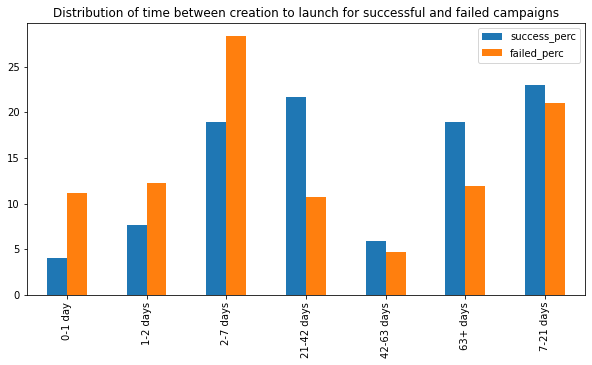

In [22]:
# Are campaigns that have longer than 1 week between creation and launch more likely to be successful?
eight('Web')

Odds Ratio: 
- Number of successful campaigns with C2L less than 1 week: 1590
- Number of successful campaigns with C2L greater than 1 week: 4428
- Number of failed campaigns with C2L less than 1 week: 4528
- Number of failed campaigns with C2L greater than 1 week: 6888
Odds Ratio: 1.83 times more likely to be successful if the C2L days is greater than 1 week

In [23]:
# to shoe the Distribution of time between launch and deadline for cancelled versus all campaigns for particular category.
def nine(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    successful_kickstarters = kickstarters[kickstarters['state'] == "successful"]
    failed_kickstarters = kickstarters[kickstarters['state'] == "failed"]
    cancelled_kickstarters = kickstarters[kickstarters['state'] == "canceled"]
    def return_week_bins(val):
        if val < 7:
            return "< 1 week"
        elif val < 14:
            return "1-2 weeks"
        elif val < 28:
            return "2-4 weeks"
        elif val < 35:
            return "4-5 weeks"
        elif val < 42:
            return "5-6 weeks"
        elif val < 56:
            return "6-8 weeks"
        else:
            return "8+ weeks"
    
    n = 'launch_to_deadline_days'
    compare_L2D = pd.concat([kickstarters[n].apply(return_week_bins).value_counts(),successful_kickstarters[n].apply(return_week_bins).value_counts(),failed_kickstarters[n].apply(return_week_bins).value_counts(),cancelled_kickstarters[n].apply(return_week_bins).value_counts()], axis=1)
    compare_L2D.columns = ['all','successful','failed','cancelled']
    compare_L2D.loc['total'] = compare_L2D.sum(axis=0)

    def get_perc(val, col):
        return (float(val) / float(compare_L2D[col]['total']))*100

    compare_L2D['all_perc'] = compare_L2D['all'].apply(get_perc, args=('all',))
    compare_L2D['success_perc'] = compare_L2D['successful'].apply(get_perc, args=('successful',))
    compare_L2D['failed_perc'] = compare_L2D['failed'].apply(get_perc, args=('failed',))
    compare_L2D['cancelled_perc'] = compare_L2D['cancelled'].apply(get_perc, args=('cancelled',)) 

    compare_L2D[['cancelled_perc','all_perc']][:6].sort_index().plot(kind='bar', figsize=(10,5), title = "Distribution of time between launch and deadline for cancelled versus all campaigns")

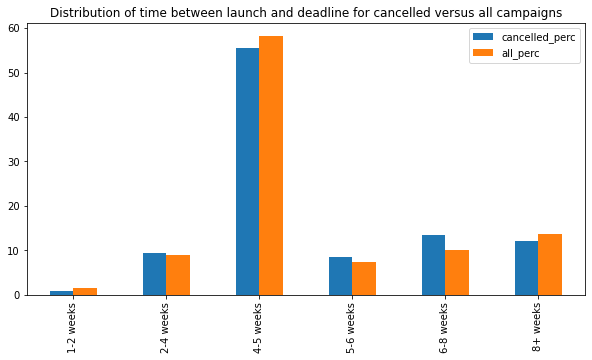

In [24]:
# pass the category
nine('Software')

### How do the goals vary based on successful, failed or cancelled campaigns?

In [25]:
def ten(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    successful_kickstarters = kickstarters[kickstarters['state'] == "successful"]
    failed_kickstarters = kickstarters[kickstarters['state'] == "failed"]
    cancelled_kickstarters = kickstarters[kickstarters['state'] == "canceled"]
    def get_goal_buckets(val):
        if val < 1001:
            return "0-1000"
        elif val < 5001:
            return "1001-5000"
        elif val < 10001:
            return "5001-10000"
        elif val < 50001:
            return "10001-50000"
        else:
            return "50001+"

    def get_perc(val, col):
        return (float(val) / float(compare_goal[col]['total']))*100
    
    n = 'goal'
    compare_goal = pd.concat([kickstarters[n].apply(get_goal_buckets).value_counts(),successful_kickstarters[n].apply(get_goal_buckets).value_counts(),failed_kickstarters[n].apply(get_goal_buckets).value_counts(),cancelled_kickstarters[n].apply(get_goal_buckets).value_counts()], axis=1)
    compare_goal.columns = ['all','successful','failed','cancelled']
    compare_goal.loc['total'] = compare_goal.sum(axis=0)

    compare_goal['all_perc'] = compare_goal['all'].apply(get_perc, args=('all',))
    compare_goal['success_perc'] = compare_goal['successful'].apply(get_perc, args=('successful',))
    compare_goal['failed_perc'] = compare_goal['failed'].apply(get_perc, args=('failed',))
    compare_goal['cancelled_perc'] = compare_goal['cancelled'].apply(get_perc, args=('cancelled',))

    compare_goal[['success_perc','failed_perc','cancelled_perc']][:5].sort_index().plot(kind='bar', figsize=(10,5), title = "Distribution of goal for successful, failed and cancelled campaigns")
    
    print("Number of successful kickstarters with goal under 50k:", len(successful_kickstarters[successful_kickstarters['goal'] < 50000]))
    print("Number of failed kickstarters with goal over 50k:", len(failed_kickstarters[failed_kickstarters['goal'] >= 50000]))
    print("Number of failed kickstarters with goal over 50k:", len(failed_kickstarters[failed_kickstarters['goal'] < 50000]))

    print("Success mean:", successful_kickstarters['goal'].median())
    print("Failed mean:", failed_kickstarters['goal'].median())

Number of successful kickstarters with goal under 50k: 209
Number of failed kickstarters with goal over 50k: 616
Number of failed kickstarters with goal over 50k: 1886
Success mean: 5000.0
Failed mean: 12500.0


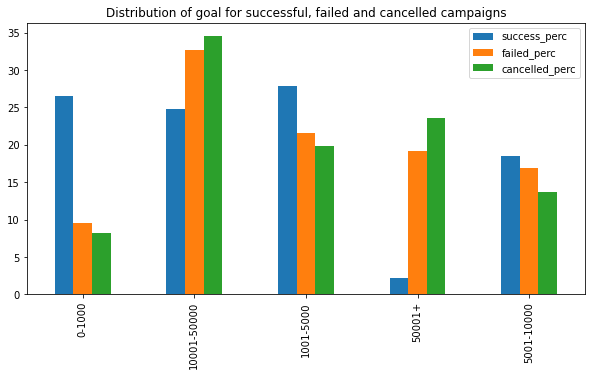

In [26]:
# What failure rate does a goal above 50K have?

ten('Web')

### Are there statistically significant differences between successful campaigns and failed campaigns?

In [27]:
def eleven(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    successful_kickstarters = kickstarters[kickstarters['state'] == "successful"]
    failed_kickstarters = kickstarters[kickstarters['state'] == "failed"]
    cancelled_kickstarters = kickstarters[kickstarters['state'] == "canceled"]
    

    print(ttest_ind(successful_kickstarters['name_len_clean'], failed_kickstarters['name_len_clean']))
    print(ttest_ind(successful_kickstarters['blurb_len_clean'], failed_kickstarters['blurb_len_clean']))
    print(ttest_ind(failed_kickstarters['launch_to_deadline_days'], successful_kickstarters['launch_to_deadline_days']))
    print(ttest_ind(successful_kickstarters['create_to_launch_days'], failed_kickstarters['create_to_launch_days']))
    print(ttest_ind(failed_kickstarters['goal'], successful_kickstarters['goal']))

    print("\nFailed kickstarter average goal", failed_kickstarters['goal'].mean())
    print("Successful kickstarter average goal", successful_kickstarters['goal'].mean())

In [28]:
eleven('Web')

Ttest_indResult(statistic=6.399328351456739, pvalue=1.8311952750978997e-10)
Ttest_indResult(statistic=1.5812120099667024, pvalue=0.1139457517081729)
Ttest_indResult(statistic=3.402912799136741, pvalue=0.0006763521342360247)
Ttest_indResult(statistic=1.813758535736057, pvalue=0.06982497765627711)
Ttest_indResult(statistic=0.782705034549457, pvalue=0.43386843156722543)

Failed kickstarter average goal 124011.66706634693
Successful kickstarter average goal 15051.797297297297


As you can see, using a p-value of <.001, the differences in sample distribution for successful and failed campaigns are *statistically significant* for "name length cleaned", "blurb length cleaned", "launch to deadline days" and "goal", but not for "create to launch days".

# Weekday versus success rates

In [29]:
# Launched weekday distribution by state
def twelve(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    successful_kickstarters = kickstarters[kickstarters['state'] == "successful"]
    failed_kickstarters = kickstarters[kickstarters['state'] == "failed"]
    cancelled_kickstarters = kickstarters[kickstarters['state'] == "canceled"]
    
    def return_week_bins(val):
        if val < 7:
            return "< 1 week"
        elif val < 14:
            return "1-2 weeks"
        elif val < 28:
            return "2-4 weeks"
        elif val < 35:
            return "4-5 weeks"
        elif val < 42:
            return "5-6 weeks"
        elif val < 56:
            return "6-8 weeks"
        else:
            return "8+ weeks"
    
    n = 'launch_to_deadline_days'
    compare_L2D = pd.concat([kickstarters[n].apply(return_week_bins).value_counts(),successful_kickstarters[n].apply(return_week_bins).value_counts(),failed_kickstarters[n].apply(return_week_bins).value_counts(),cancelled_kickstarters[n].apply(return_week_bins).value_counts()], axis=1)
    compare_L2D.columns = ['all','successful','failed','cancelled']
    compare_L2D.loc['total'] = compare_L2D.sum(axis=0)

    def get_perc(val, col):
        return (float(val) / float(compare_L2D[col]['total']))*100

    compare_L2D['all_perc'] = compare_L2D['all'].apply(get_perc, args=('all',))
    compare_L2D['success_perc'] = compare_L2D['successful'].apply(get_perc, args=('successful',))
    compare_L2D['failed_perc'] = compare_L2D['failed'].apply(get_perc, args=('failed',))
    compare_L2D['cancelled_perc'] = compare_L2D['cancelled'].apply(get_perc, args=('cancelled',)) 
    
    
    def return_date_bins(val):
        if val < 1:
            return "0-1 day"
        elif val < 2:
            return "1-2 days"
        elif val < 7:
            return "2-7 days"
        elif val < 21:
            return "7-21 days"
        elif val < 42:
            return "21-42 days"
        elif val < 63:
            return "42-63 days"
        else:
            return "63+ days"
        
    def get_perc(val, col):
        return (float(val) / float(compare_C2L[col]['total']))*100

    n = 'create_to_launch_days'
    compare_C2L = pd.concat([kickstarters[n].apply(return_date_bins).value_counts(),successful_kickstarters[n].apply(return_date_bins).value_counts(),failed_kickstarters[n].apply(return_date_bins).value_counts(),cancelled_kickstarters[n].apply(return_date_bins).value_counts()], axis=1)
    compare_C2L.columns = ['all','successful','failed','cancelled']
    compare_C2L.loc['total'] = compare_C2L.sum(axis=0)

    compare_C2L['all_perc'] = compare_C2L['all'].apply(get_perc, args=('all',))
    compare_C2L['success_perc'] = compare_C2L['successful'].apply(get_perc, args=('successful',))
    compare_C2L['failed_perc'] = compare_C2L['failed'].apply(get_perc, args=('failed',))
    compare_C2L['cancelled_perc'] = compare_C2L['cancelled'].apply(get_perc, args=('cancelled',))
    
    compare_launched_df = pd.concat([successful_kickstarters['launched_at_weekday'].value_counts(), failed_kickstarters['launched_at_weekday'].value_counts()], axis=1)
    compare_launched_df.columns = ['successful','failed']
    compare_L2D.loc['total'] = compare_C2L.sum(axis=0)
    

    compare_launched_df['success_perc'] = compare_launched_df['successful'].apply(get_perc, args=('successful',))
    compare_launched_df['failed_perc'] = compare_launched_df['failed'].apply(get_perc, args=('failed',))
    compare_launched_df.index = ["(5) Friday","(1) Monday","(6) Saturday","(7) Sunday","(4) Thursday","(2) Tuesday","(3) Wednesday"]
    compare_launched_df = compare_launched_df.sort_index()
    print(compare_launched_df)

    compare_launched_df[['success_perc','failed_perc']].plot(kind='bar', figsize=(10,5), title = "Distribution of weekday launch for successful and failed campaigns")
    

               successful  failed  success_perc  failed_perc
(1) Monday             42     536     18.918919    21.422862
(2) Tuesday            12     104      5.405405     4.156675
(3) Wednesday           9     102      4.054054     4.076739
(4) Thursday           21     376      9.459459    15.027978
(5) Friday             60     525     27.027027    20.983213
(6) Saturday           40     372     18.018018    14.868106
(7) Sunday             38     487     17.117117    19.464428


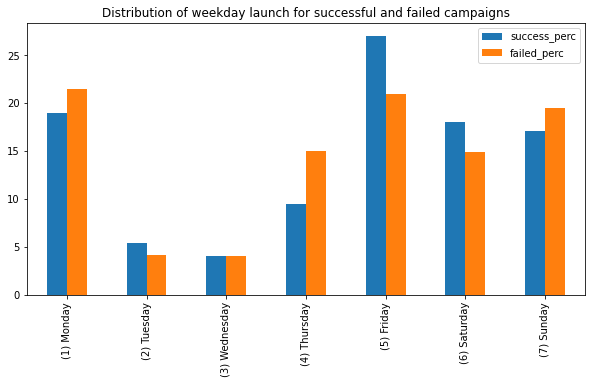

In [30]:
# How much likely are campaigns launched on a Tuesday to be successful than average?
twelve('Web')

In [31]:
# Deadline weekday distribution by state
def thirteen(x):
    kickstarters = kickstarter[kickstarter['category']==x]
    successful_kickstarters = kickstarters[kickstarters['state'] == "successful"]
    failed_kickstarters = kickstarters[kickstarters['state'] == "failed"]
    cancelled_kickstarters = kickstarters[kickstarters['state'] == "canceled"]
    
    def return_week_bins(val):
        if val < 7:
            return "< 1 week"
        elif val < 14:
            return "1-2 weeks"
        elif val < 28:
            return "2-4 weeks"
        elif val < 35:
            return "4-5 weeks"
        elif val < 42:
            return "5-6 weeks"
        elif val < 56:
            return "6-8 weeks"
        else:
            return "8+ weeks"
    
    n = 'launch_to_deadline_days'
    compare_L2D = pd.concat([kickstarters[n].apply(return_week_bins).value_counts(),successful_kickstarters[n].apply(return_week_bins).value_counts(),failed_kickstarters[n].apply(return_week_bins).value_counts(),cancelled_kickstarters[n].apply(return_week_bins).value_counts()], axis=1)
    compare_L2D.columns = ['all','successful','failed','cancelled']
    compare_L2D.loc['total'] = compare_L2D.sum(axis=0)

    def get_perc(val, col):
        return (float(val) / float(compare_L2D[col]['total']))*100

    compare_L2D['all_perc'] = compare_L2D['all'].apply(get_perc, args=('all',))
    compare_L2D['success_perc'] = compare_L2D['successful'].apply(get_perc, args=('successful',))
    compare_L2D['failed_perc'] = compare_L2D['failed'].apply(get_perc, args=('failed',))
    compare_L2D['cancelled_perc'] = compare_L2D['cancelled'].apply(get_perc, args=('cancelled',)) 
    
    
    def return_date_bins(val):
        if val < 1:
            return "0-1 day"
        elif val < 2:
            return "1-2 days"
        elif val < 7:
            return "2-7 days"
        elif val < 21:
            return "7-21 days"
        elif val < 42:
            return "21-42 days"
        elif val < 63:
            return "42-63 days"
        else:
            return "63+ days"
        
    def get_perc(val, col):
        return (float(val) / float(compare_C2L[col]['total']))*100

    n = 'create_to_launch_days'
    compare_C2L = pd.concat([kickstarters[n].apply(return_date_bins).value_counts(),successful_kickstarters[n].apply(return_date_bins).value_counts(),failed_kickstarters[n].apply(return_date_bins).value_counts(),cancelled_kickstarters[n].apply(return_date_bins).value_counts()], axis=1)
    compare_C2L.columns = ['all','successful','failed','cancelled']
    compare_C2L.loc['total'] = compare_C2L.sum(axis=0)

    compare_C2L['all_perc'] = compare_C2L['all'].apply(get_perc, args=('all',))
    compare_C2L['success_perc'] = compare_C2L['successful'].apply(get_perc, args=('successful',))
    compare_C2L['failed_perc'] = compare_C2L['failed'].apply(get_perc, args=('failed',))
    compare_C2L['cancelled_perc'] = compare_C2L['cancelled'].apply(get_perc, args=('cancelled',))
    
    compare_deadline_df = pd.concat([successful_kickstarters['deadline_weekday'].value_counts(), failed_kickstarters['deadline_weekday'].value_counts()], axis=1)
    compare_deadline_df.columns = ['successful','failed']
    compare_L2D.loc['total'] = compare_C2L.sum(axis=0)

    compare_deadline_df['success_perc'] = compare_deadline_df['successful'].apply(get_perc, args=('successful',))
    compare_deadline_df['failed_perc'] = compare_deadline_df['failed'].apply(get_perc, args=('failed',))

    compare_deadline_df[['success_perc','failed_perc']].plot(kind='bar', figsize=(10,5), title = "Distribution of weekday deadline for successful and failed campaigns")

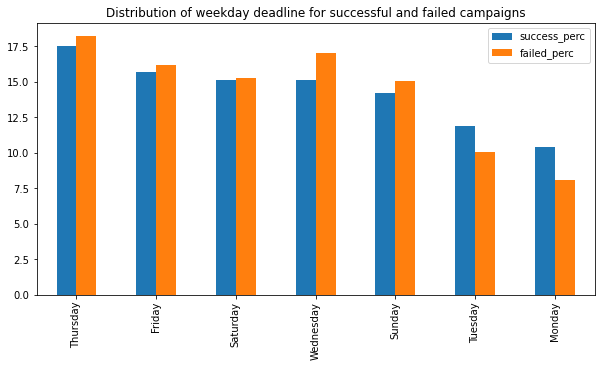

In [32]:
thirteen('Software')

We can see that campaigns are more likely to be successful if they are launched on a Tuesday. And are more likely to fail if they have a deadline on a weekend. So, we will create new boolean variables for LaunchedTuesday and DeadlineWeekend.

In [33]:
def launched_tues(val):
    if val == "Tuesday":
        return 1
    else:
        return 0
    
kickstarter['LaunchedTuesday'] = kickstarter['launched_at_weekday'].apply(launched_tues)

def deadline_weekend(val):
    if val == "Saturday":
        return 1
    elif val == "Sunday":
        return 1
    else:
        return 0
    
kickstarter['DeadlineWeekend'] = kickstarter['deadline_weekday'].apply(deadline_weekend)

### Let's explore the categories of Kickstarter campaigns further.

<AxesSubplot:title={'center':'Category Distribution'}>

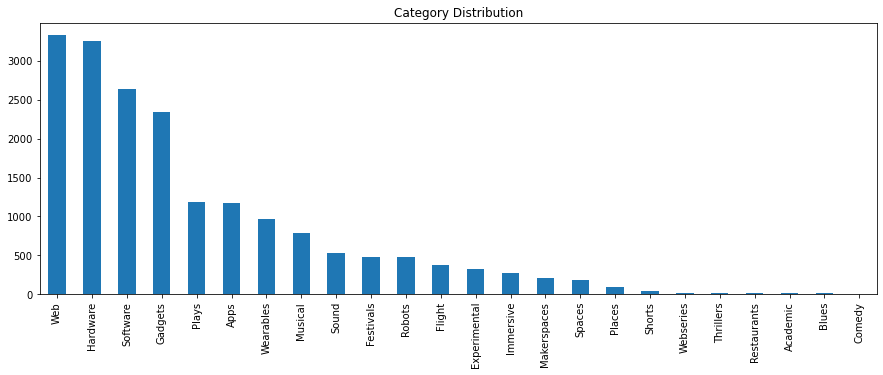

In [34]:
kickstarter['category'].value_counts().plot(kind = 'bar',title = 'Category Distribution', figsize=(15,5))

<AxesSubplot:title={'center':'Average goal amount per category'}, xlabel='category'>

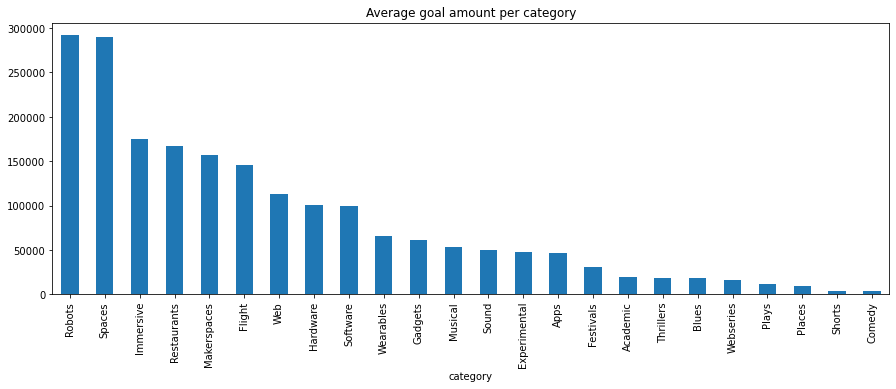

In [35]:
# What is the average goal amount per category?
kickstarter_cat_goal = kickstarter.groupby(['category'])[['goal']].mean()
kickstarter_cat_goal = kickstarter_cat_goal.unstack()
kickstarter_cat_goal['goal'].sort_values(ascending=False).plot(kind='bar', figsize=(15,5), title = "Average goal amount per category")

<AxesSubplot:title={'center':'Range of goal amount per category'}, xlabel='category'>

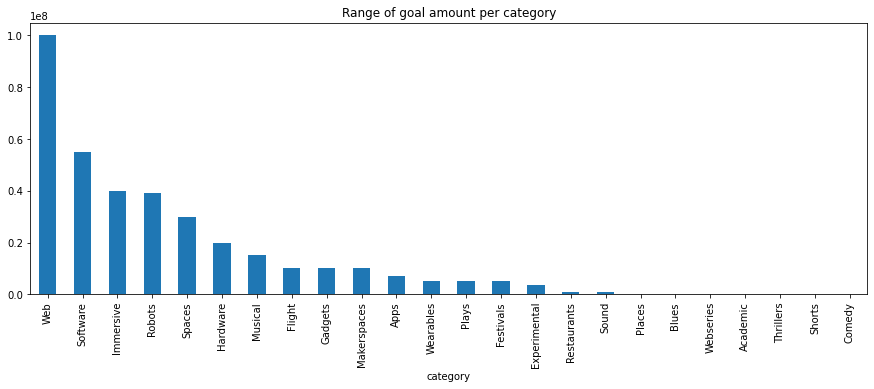

In [36]:
# What is the range of goal amount per category?
kickstarter_cat_goal_2 = kickstarter.groupby(['category'])[['goal']].agg([min,max])
kickstarter_cat_goal_2 = kickstarter_cat_goal_2['goal']
kickstarter_cat_goal_2['range'] = kickstarter_cat_goal_2['max'] - kickstarter_cat_goal_2['min']
kickstarter_cat_goal_2['range'].sort_values(ascending=False).plot(kind='bar', figsize=(15,5), title = "Range of goal amount per category")

**NOTE:** skewed by categories with low volume.

<AxesSubplot:title={'center':'Success rate by category'}, xlabel='category'>

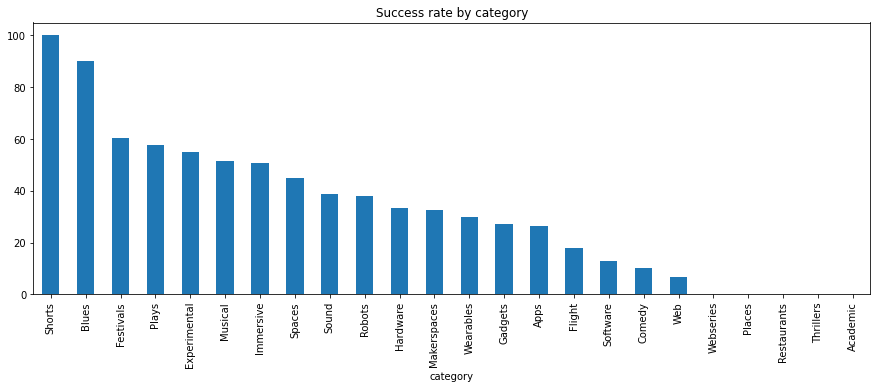

In [37]:
# Which categories are most likely to be successful? (% success rate by category)
kickstarter_cat_succ = kickstarter.groupby(['category','state'])[['state']].count()
kickstarter_cat_succ = kickstarter_cat_succ.unstack()
kickstarter_cat_succ = kickstarter_cat_succ['state']
kickstarter_cat_succ = kickstarter_cat_succ.fillna(0)

def calc_perc_success(row):
    success_num = row['successful']
    total = row.sum()
    return float(success_num)/float(total)*100

kickstarter_cat_succ['perc_success'] = kickstarter_cat_succ.apply(calc_perc_success, axis=1)
kickstarter_cat_succ['perc_success'].sort_values(ascending=False).plot(kind = 'bar', figsize=(15,5), title = "Success rate by category")

## How much money is lost from failed campaigns?

In [38]:
kickstarter[kickstarter['state']=='failed']['pledged'].sum()

31707603.239999995

## Building the Correlation Heatmap.

<AxesSubplot:>

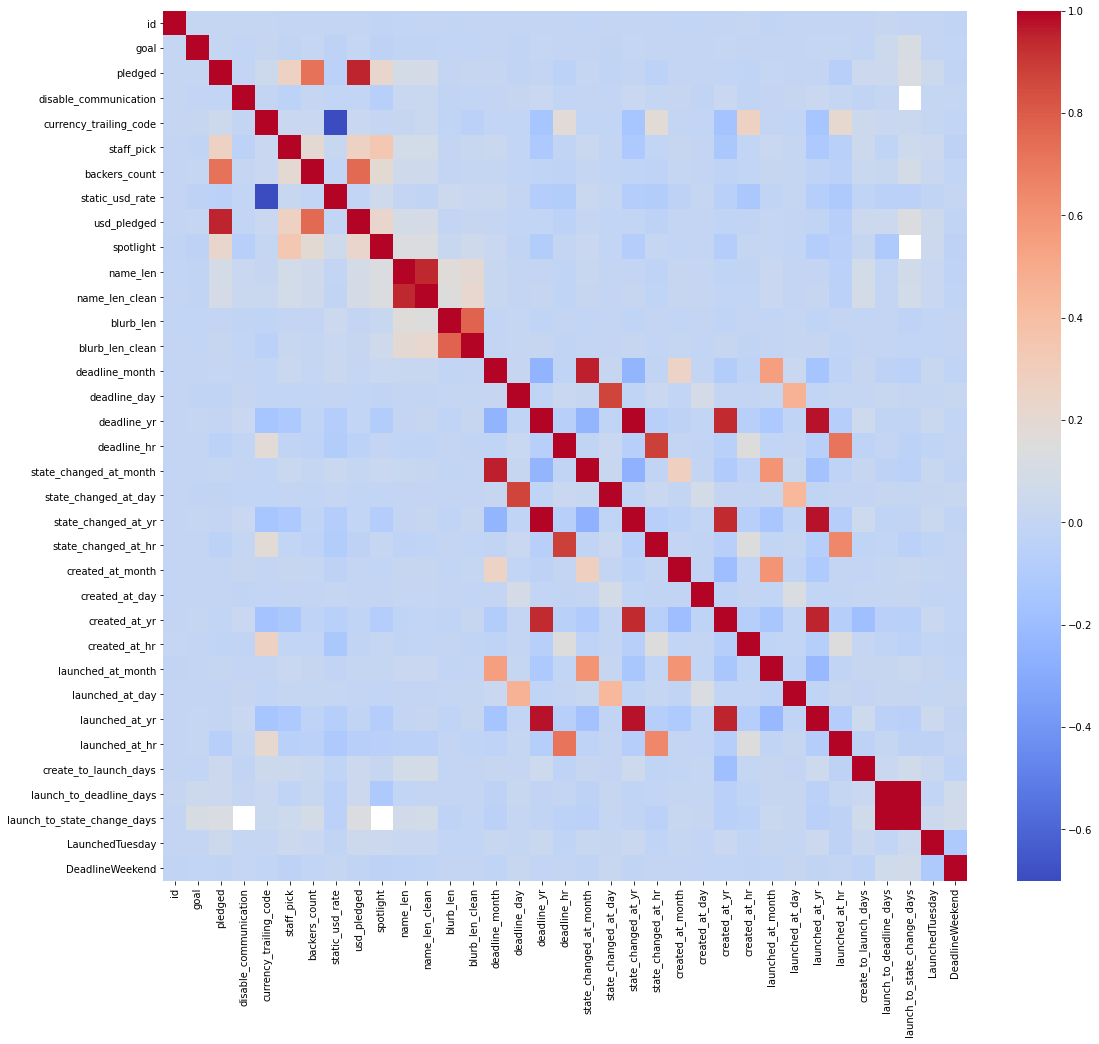

In [39]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(18,16))
cor = kickstarter.corr()
sns.heatmap(cor,cmap='coolwarm')

# Building a regression model

In [40]:
import statsmodels.api as sm
from patsy import dmatrices

# def get_bool(state):
#     if not state == "successful" :
#         return 0
#     else:
#         return 1

# kickstarter['SuccessfulBool'] = kickstarter['state'].apply(get_bool)

kickstarter['SuccessfulBool'] = 0
mask = (kickstarter['state'] == 'successful')
kickstarter.loc[mask, 'SuccessfulBool'] = 1

def get_TOPCOUNTRY(country):
    if country in ["US","GB","HK","MX","NZ"]:
        return 1
    else:
        return 0

kickstarter['TOPCOUNTRY'] = kickstarter['country'].apply(get_TOPCOUNTRY)

kickstarter['LaunchedTuesSun'] = 0
mask = (kickstarter['launched_at_weekday'] == "Tuesday") | (kickstarter['launched_at_weekday'] == "Sunday")
kickstarter.loc[mask, 'LaunchedTuesSun'] = 1

kickstarter.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'creator', 'location', 'category', 'profile',
       'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len',
       'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch

In [41]:
kickstarter['SuccessfulBool'].value_counts()

0    14614
1     6018
Name: SuccessfulBool, dtype: int64

### Write design matrix to file for building models

In [42]:
y, X = dmatrices('SuccessfulBool ~ name_len_clean + blurb_len_clean + launch_to_deadline_days + launch_to_state_change_days + TOPCOUNTRY + LaunchedTuesSun', data=kickstarter, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         SuccessfulBool   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -1002.
Date:                Sat, 27 Mar 2021   Prob (F-statistic):               1.00
Time:                        22:27:03   Log-Likelihood:             1.7595e+05
No. Observations:                6018   AIC:                        -3.519e+05
Df Residuals:                    6011   BIC:                        -3.518e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# Running K Nearest Neighbors

In [43]:
kick = kickstarter[['name_len_clean','blurb_len_clean','launch_to_deadline_days','TOPCOUNTRY','LaunchedTuesSun','SuccessfulBool']]
kick.dropna(inplace=True)
X = kick.drop('SuccessfulBool',axis=1)
y = kick['SuccessfulBool']
X.isnull().sum()
X.head()

,name_len_clean,blurb_len_clean,launch_to_deadline_days,TOPCOUNTRY,LaunchedTuesSun
0,9.0,16.0,36,1,0
1,4.0,15.0,60,1,0
2,8.0,10.0,60,1,1
3,6.0,13.0,30,1,0
4,7.0,18.0,32,0,0


In [46]:
from sklearn.model_selection import train_test_split
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up model
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=15,
                                       weights='uniform',
                                       p=2)
# Fit the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [47]:
# Run model on entire training data to find training accuracy
from sklearn import metrics
prediction_on_training = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_on_training))

0.7222607009281063


In [48]:
# Run model on test data to find test accuracy
predicted_classes = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes))

0.6888027144934561


In [49]:

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# from xgboost import XGBRegressor
# from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, VotingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, precision_score, recall_score)
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier

# import lightgbm as lgb

In [50]:
model=[]
model_name=[]


from sklearn.linear_model import LogisticRegression
model.append(LogisticRegression())
model_name.append('Logistic Regression')

from sklearn.tree import DecisionTreeClassifier
model.append(DecisionTreeClassifier())
model_name.append('Decision Tree')


from sklearn.ensemble import RandomForestClassifier
model.append(RandomForestClassifier())
model_name.append("Random Forest")

from sklearn.neighbors import KNeighborsClassifier 
model.append(KNeighborsClassifier(n_neighbors=10))
model_name.append('KNN')

from sklearn import svm
# model.append(svm.SVC(kernel='linear'))
# model_name.append('svm_linear')

model.append( svm.SVC(kernel='rbf'))
model_name.append('svm_rbf')

# model.append(XGBClassifier())
# model_name.append('xgb')

# model.append(LGBMClassifier(objective='multiclass', random_state=5))
# model_name.append('lgbm')

from sklearn.ensemble import AdaBoostClassifier
model.append(AdaBoostClassifier(n_estimators=50,learning_rate=1))
model_name.append('adaboost')



for i in range(len(model)):
    print(model_name[i])
    model[i].fit(X_train, y_train)
    pred=model[i].predict(X_test)
    print((pred==y_test).sum()/y_test.shape[0])

Logistic Regression
0.7052835676199709
Decision Tree
0.6690903215382129
Random Forest
0.6805622879301988
KNN
0.689125868476329
svm_rbf
0.707222491517208
adaboost
0.707222491517208


In [57]:
# randomly generated test case
case1 = [[6.0,9.0,50,0,1],]
case2 = [[10.0,5.0,80,1,0],]

In [56]:
#making predictions for case1
for i in range(len(model)):
    print(model_name[i])
    model[i].fit(X_train, y_train)
    pred=model[i].predict(case1)
    if pred==0:
        print('Failed')
    else:
        print('Successfull')

Logistic Regression
Failed
Decision Tree
Failed
Random Forest
Failed
KNN
Failed
svm_rbf
Failed
adaboost
Failed


In [58]:
# making predictions for case2
for i in range(len(model)):
    print(model_name[i])
    model[i].fit(X_train, y_train)
    pred=model[i].predict(case2)
    if pred==0:
        print('Failed')
    else:
        print('Successfull')

Logistic Regression
Failed
Decision Tree
Successfull
Random Forest
Failed
KNN
Failed
svm_rbf
Failed
adaboost
Successfull


### Fact-> 11.4 million dollars were wasted in 2016 from failed and cancelled Kickstarter campaigns